<a href="https://colab.research.google.com/github/Tejeswini-98/CLASS-NOTE-ML-ALGORITHMNS/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![unnamed-chunk-7.gif](attachment:unnamed-chunk-7.gif)# 

# Kmeans

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [ ]:
iris=sns.load_dataset("iris")

In [ ]:
scaler = MinMaxScaler()
iris_scaled = scaler.fit_transform(iris.iloc[:,:-1])

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 5.1,4.9,4.7,4.6,5.0

# 4.6
# 5.1

# (x-4.6)/5.1  

In [ ]:
#iris_scaled

In [ ]:
model = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto',init="k-means++")
#model.fit(iris_scaled)

In [ ]:
model.fit(iris_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pred=model.predict(iris_scaled)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
model.cluster_centers_

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

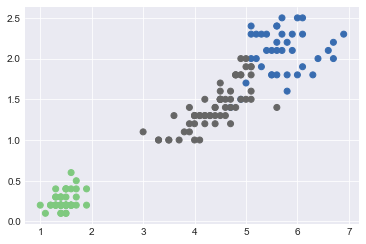

In [ ]:
plt.scatter(iris.iloc[:,2],iris.iloc[:,3],c=pred,cmap=plt.cm.Accent)

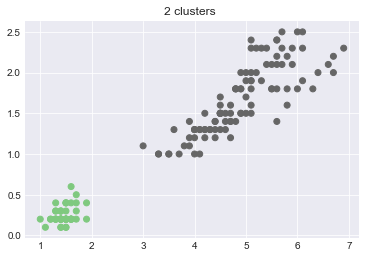

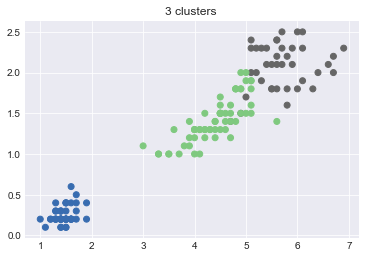

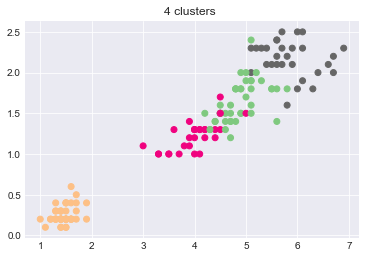

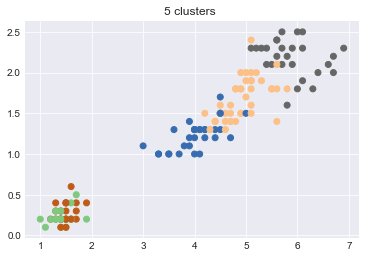

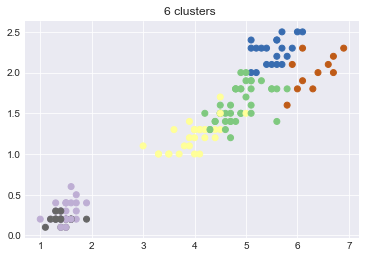

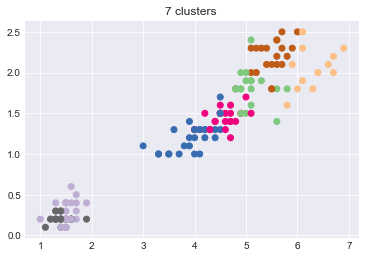

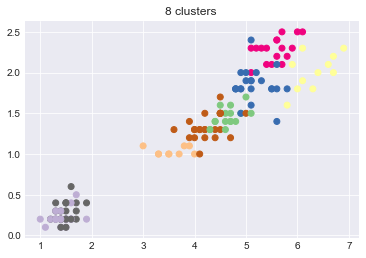

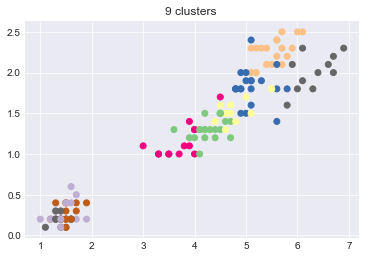

In [ ]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=600, algorithm = 'auto',init="k-means++",)
    model.fit(iris_scaled)    
    pred=model.predict(iris_scaled)    
    plt.scatter(iris.iloc[:,2],iris.iloc[:,3],c=pred,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()



In [ ]:
model.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

In [ ]:
def fun(data,center):
    for i in range(100):
        data["new"]=list(data.iloc[:,:].values)
        for i in range(len(center)):
            data["column"+str(i)]=data["new"].apply(lambda x: np.linalg.norm(np.array(x)-center[i]))
        #print(data.head())    
        col=["column"+str(i) for i in range(len(center)) ]    
        col2=np.argmin(data[col].values,axis=1)
        #print(col2)
        data["close"]=col2
        data.drop("new", axis=1,inplace=True)
        for i in col:
             data.drop(i, axis=1,inplace=True)
        l=len(center)
        
        for i in range(l):
             data1=data[data.close==i].copy()
             #print("shape",data1.shape)   
             if data1.shape[0]>0:
                  center[i]=np.mean(data1.iloc[:,:-1].values,axis=0)
                  print(center[i]) 
        #data.drop("close",axis=1,inplace=True)
        plt.scatter(data[data.close==0].iloc[:,0],data[data.close==0].iloc[:,1],s=3,color="red")
        plt.scatter(data[data.close==1].iloc[:,0],data[data.close==1].iloc[:,1],s=3,color="green")
        plt.scatter(data[data.close==2].iloc[:,0],data[data.close==2].iloc[:,1],s=3)
        plt.scatter(center[0][0],  center[0][1] ,color="black",s=200,marker="*")
        plt.scatter(center[1][0],  center[1][1] ,color="black",s=200,marker="*")
        plt.scatter(center[2][0],  center [2][1],color="black" ,s=200,marker="*")
        plt.title(str(3)+"means  pred")
        plt.show()
        data.drop("close",axis=1,inplace=True)    
    data["closet"]=col2            
    return data

In [ ]:
b=np.array([[2  ,0.1],
       [3   , 1],
       [6    , 2]])


In [ ]:

#b=np.random.normal(0,3,(3,2))

In [ ]:
b[1]

array([3., 1.])

[1.462 0.246]
[4.04857143 1.25428571]
[5.36769231 1.90307692]


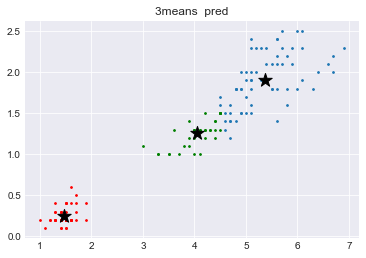

[1.462 0.246]
[4.16590909 1.29318182]
[5.4875     1.97678571]


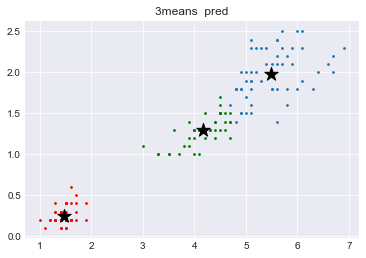

[1.462 0.246]
[4.19130435 1.30217391]
[5.51481481 1.99444444]


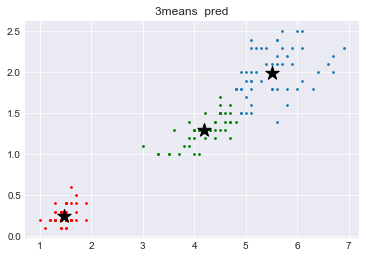

[1.462 0.246]
[4.22083333 1.31041667]
[5.53846154 2.01346154]


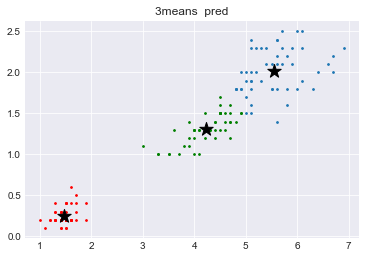

[1.462 0.246]
[4.25490196 1.33921569]
[5.58367347 2.02653061]


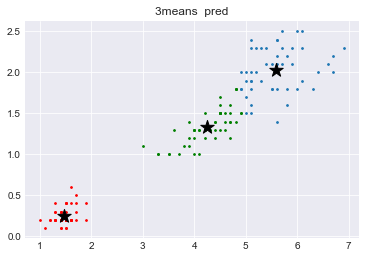

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


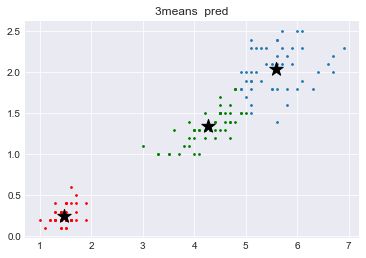

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


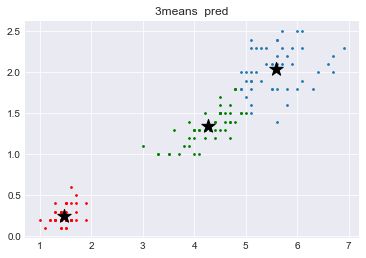

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


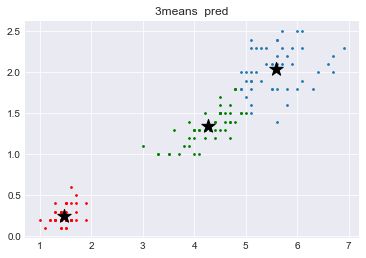

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


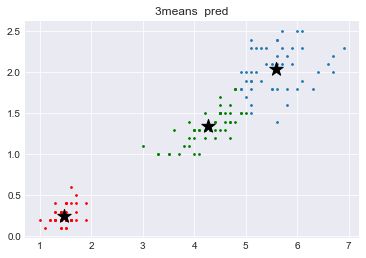

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


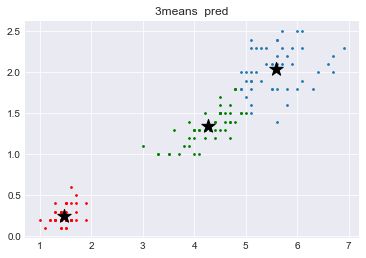

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


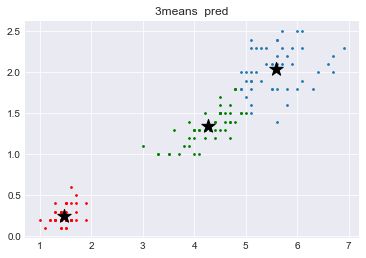

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


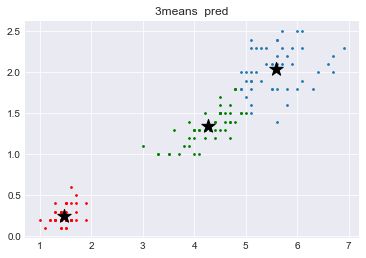

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


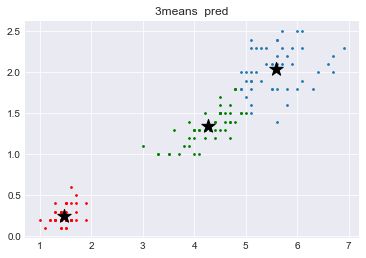

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


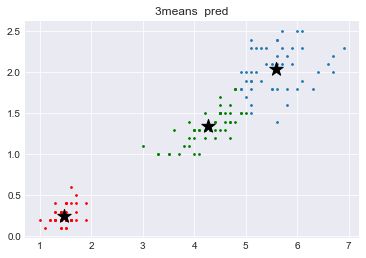

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


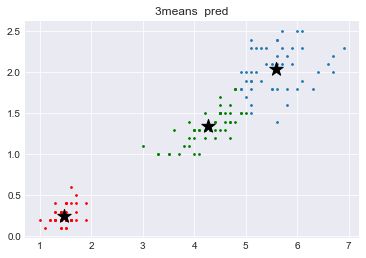

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


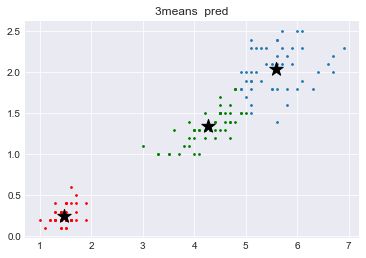

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


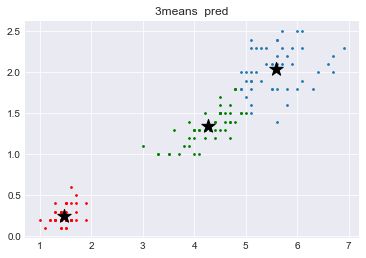

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


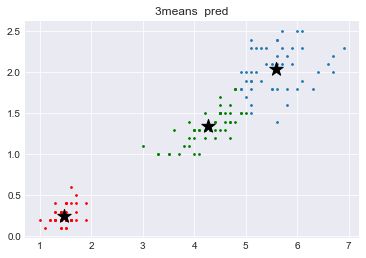

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


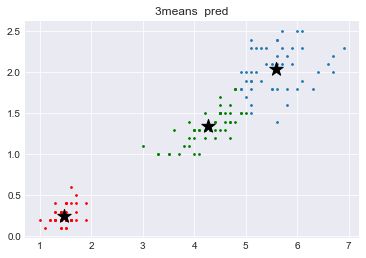

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


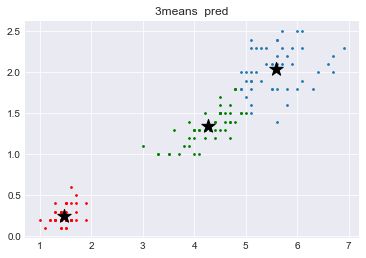

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


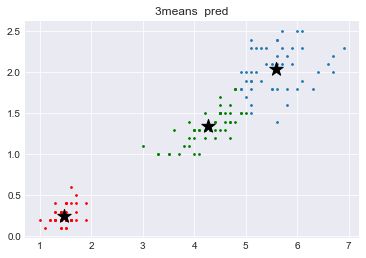

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


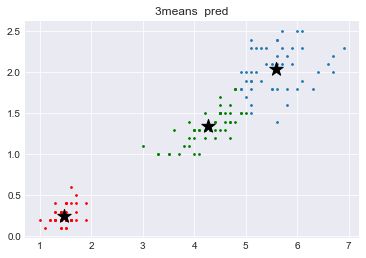

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


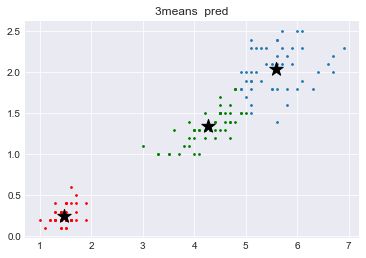

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


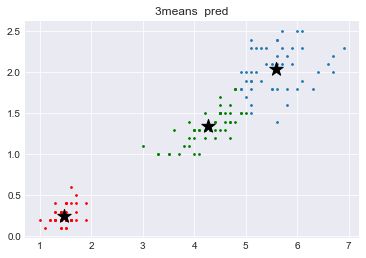

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


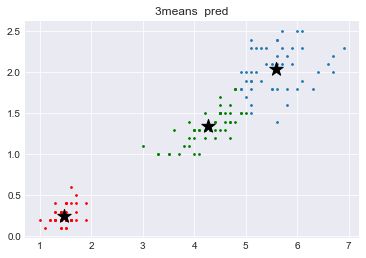

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


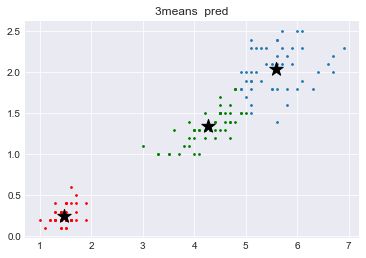

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


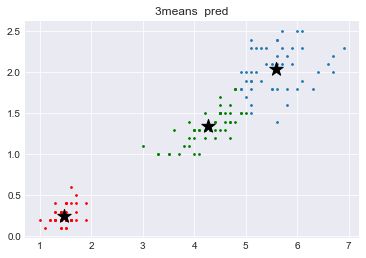

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


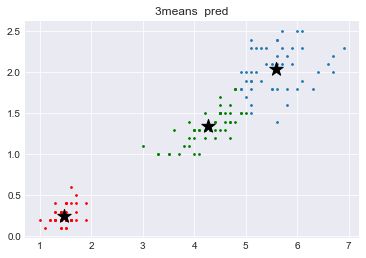

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


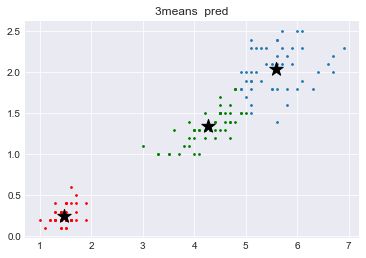

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


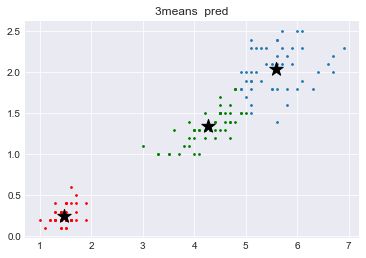

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


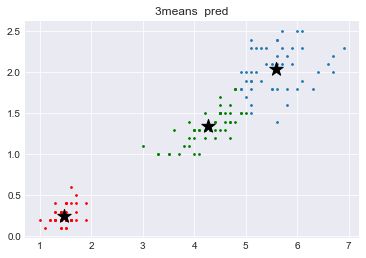

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


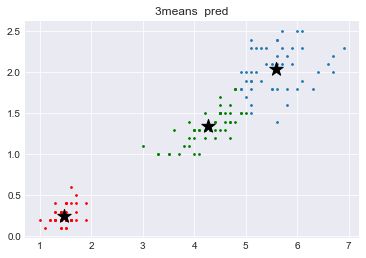

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


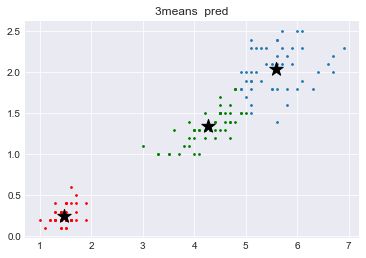

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


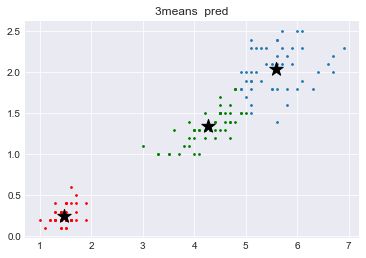

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


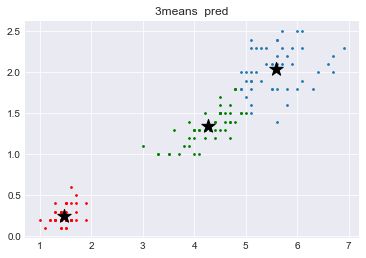

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


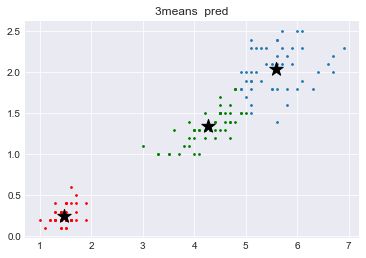

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


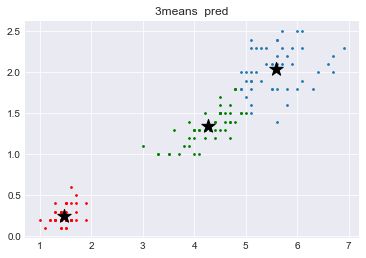

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


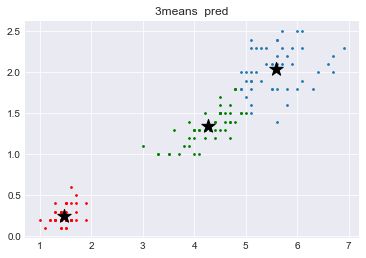

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


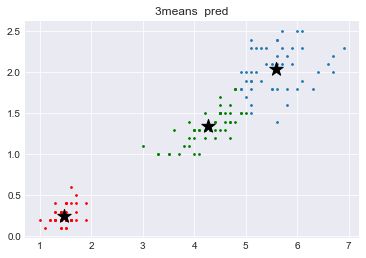

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


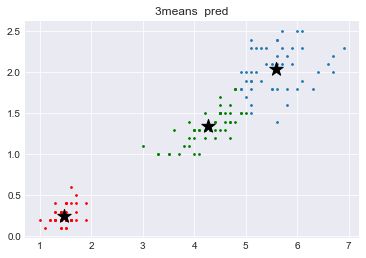

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


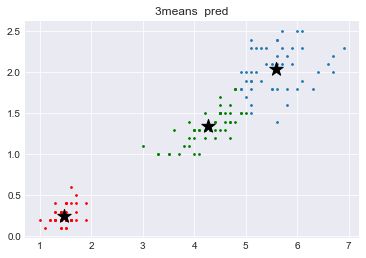

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


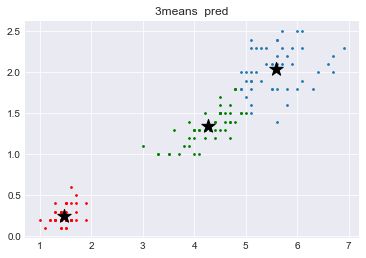

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


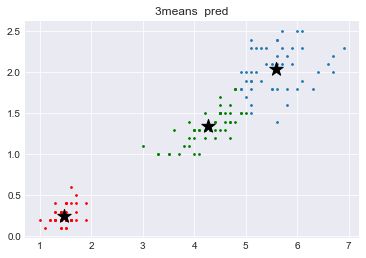

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


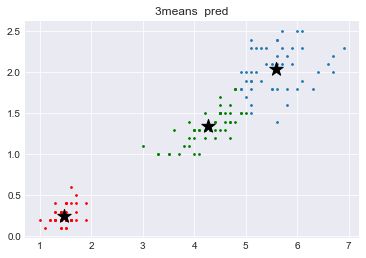

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


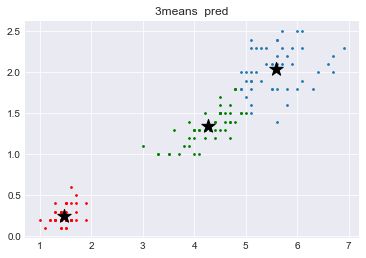

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


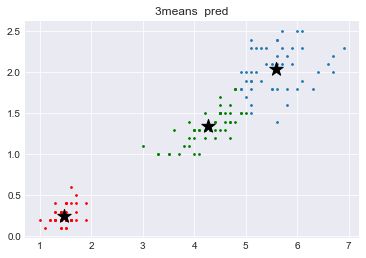

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


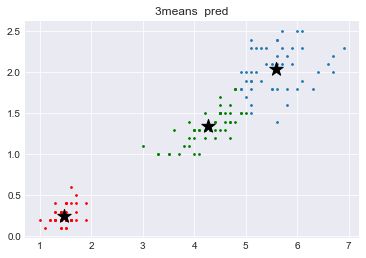

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


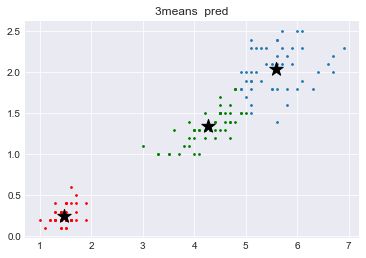

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


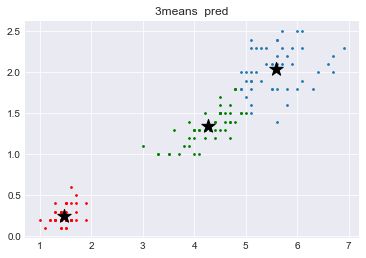

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


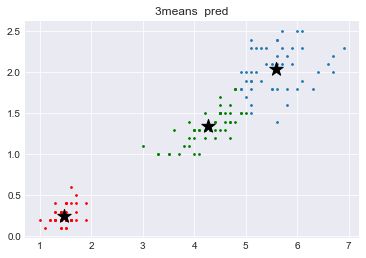

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


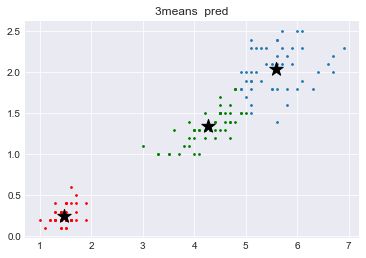

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


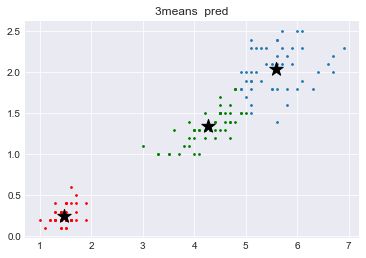

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


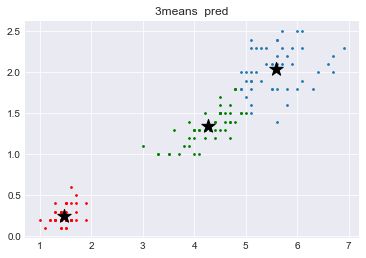

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


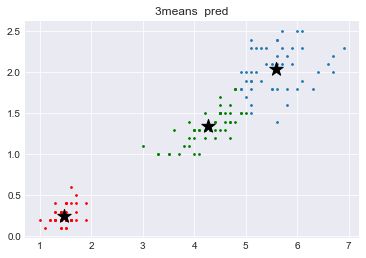

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


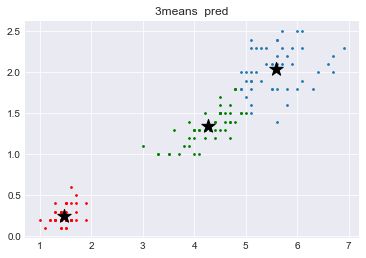

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


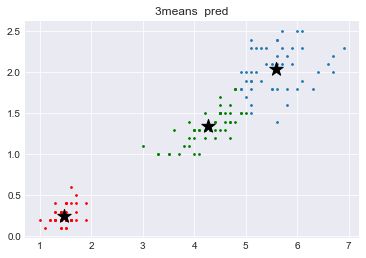

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


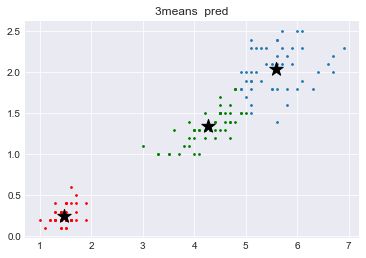

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


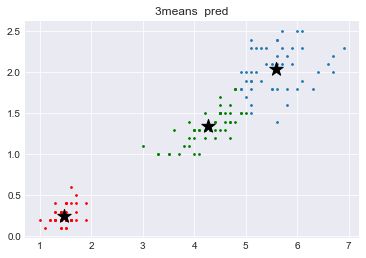

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


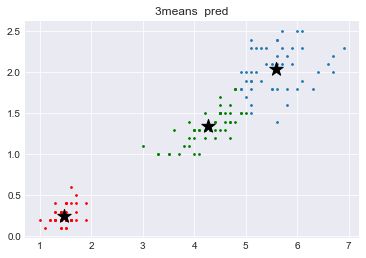

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


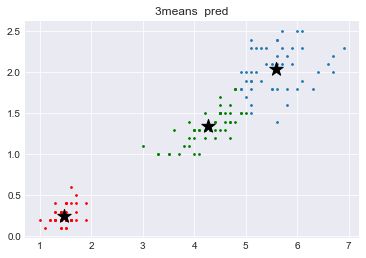

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


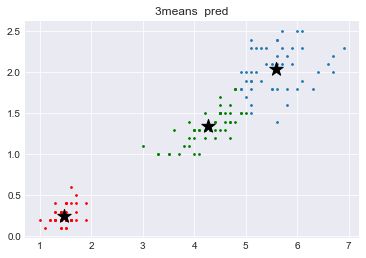

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


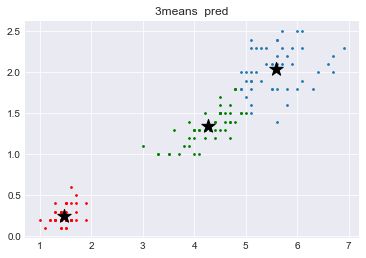

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


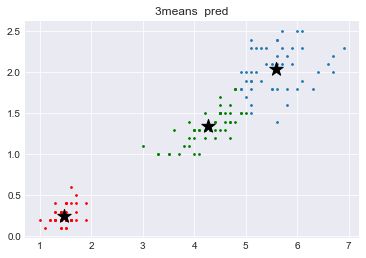

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


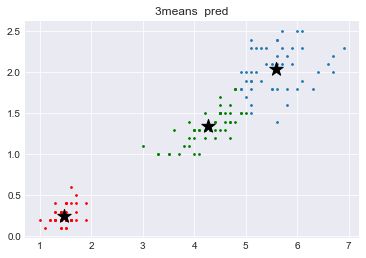

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


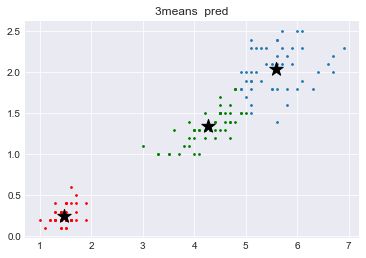

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


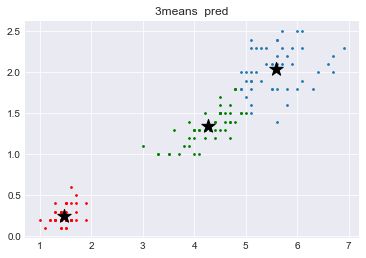

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


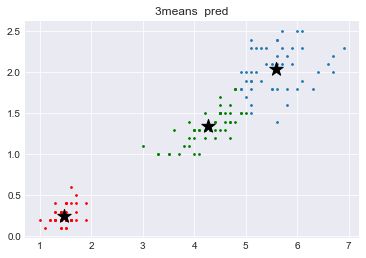

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


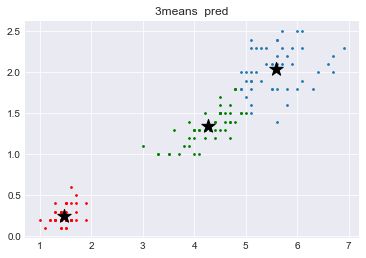

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


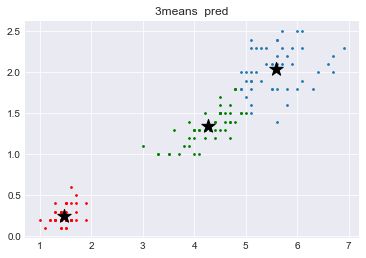

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


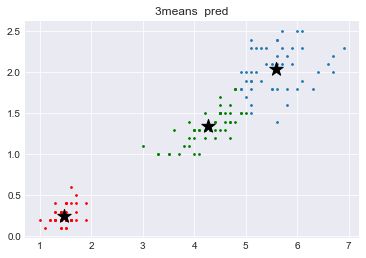

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


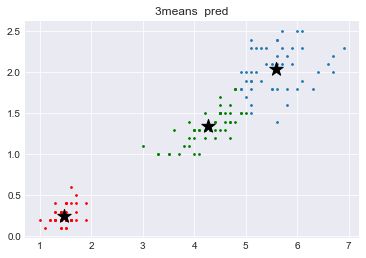

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


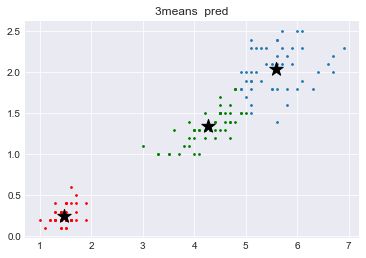

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


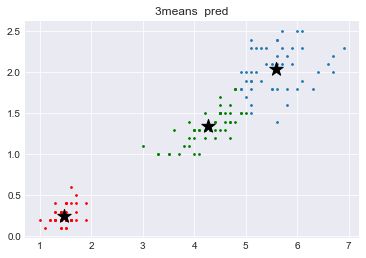

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


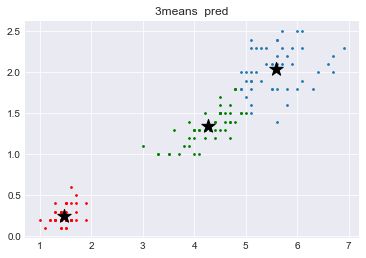

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


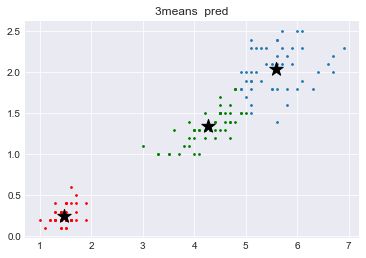

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


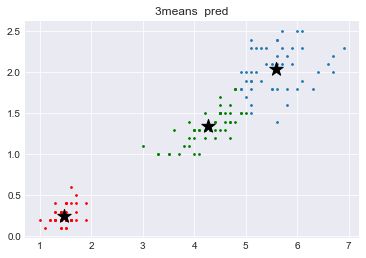

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


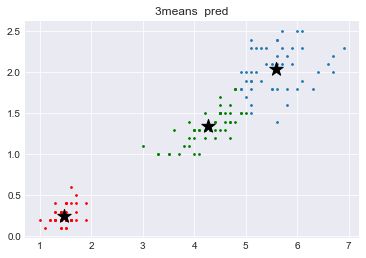

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


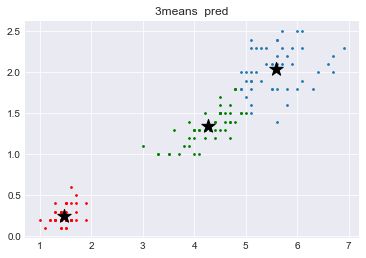

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


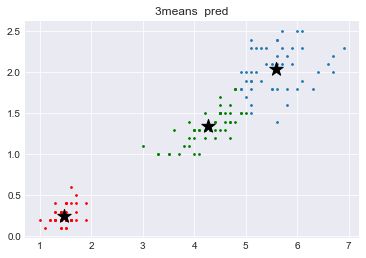

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


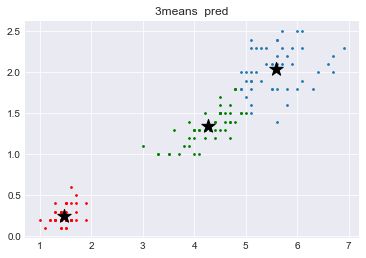

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


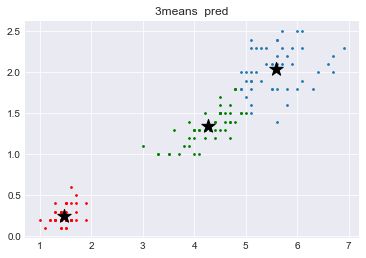

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


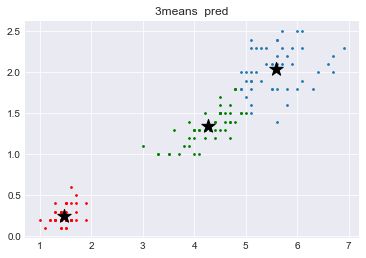

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


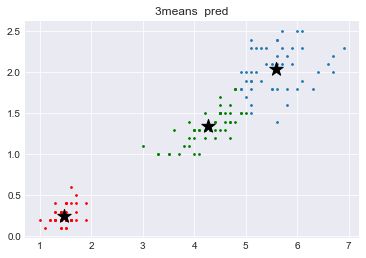

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


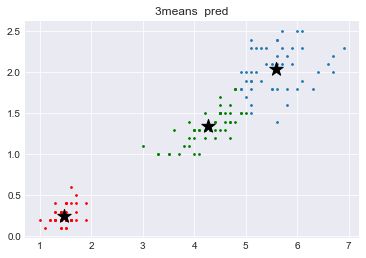

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


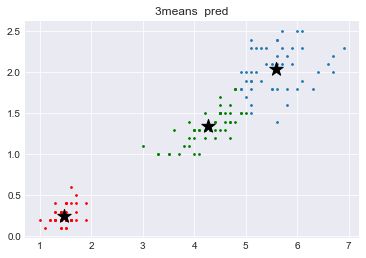

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


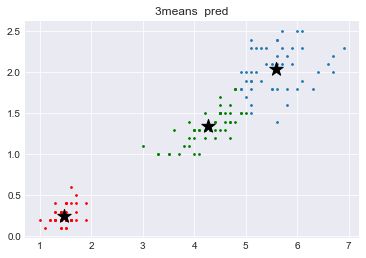

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


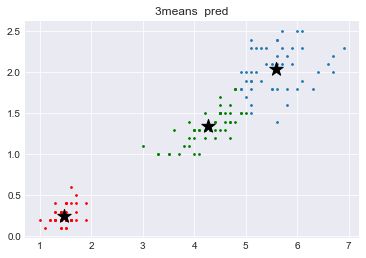

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


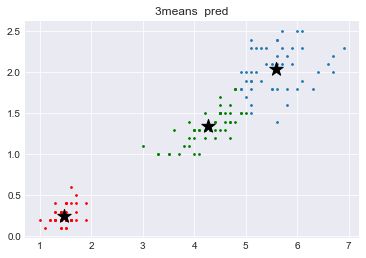

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


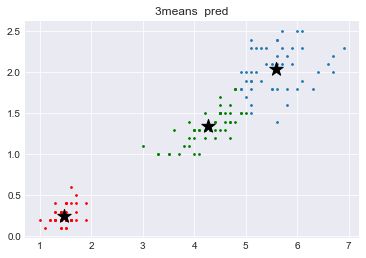

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


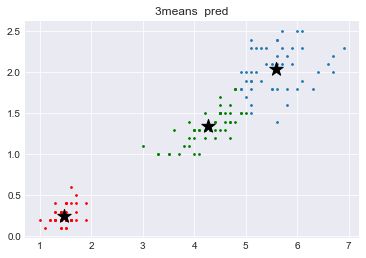

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


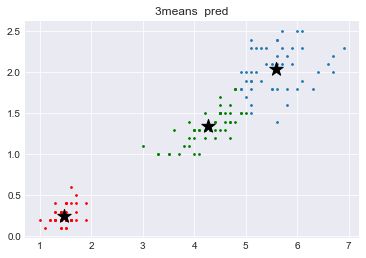

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


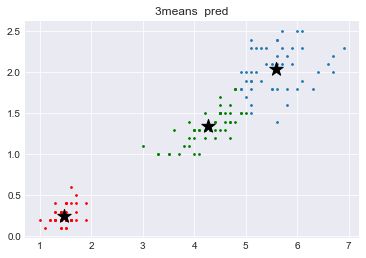

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


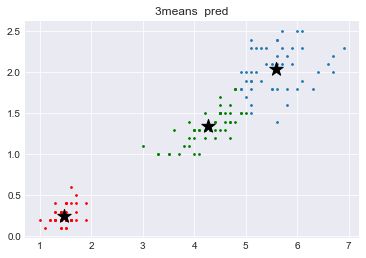

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


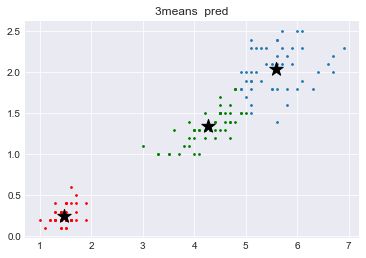

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


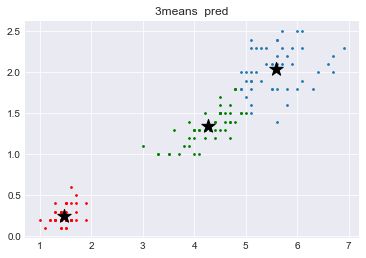

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


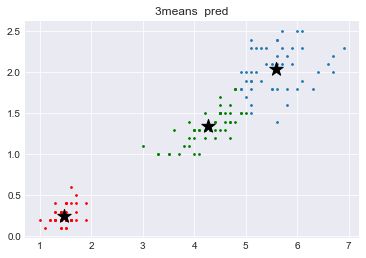

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


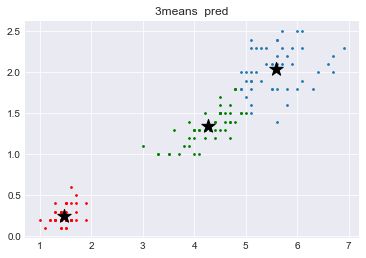

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


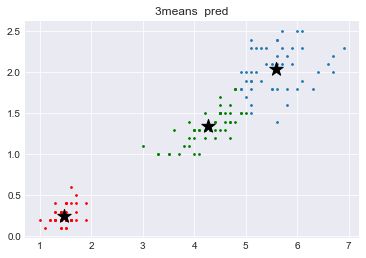

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


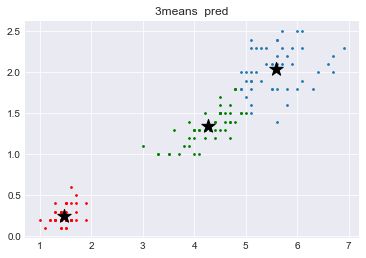

[1.462 0.246]
[4.26923077 1.34230769]
[5.59583333 2.0375    ]


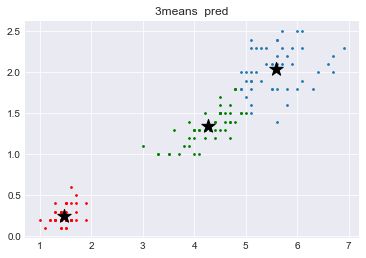

In [ ]:
a=fun(iris.iloc[:,2:4],b)

In [ ]:
model.cluster_centers_


array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

#  .

![giphy.gif](attachment:giphy.gif)# 

# Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [ ]:
??pdist

In [ ]:
xdist=pdist(iris_scaled,metric="euclidean")

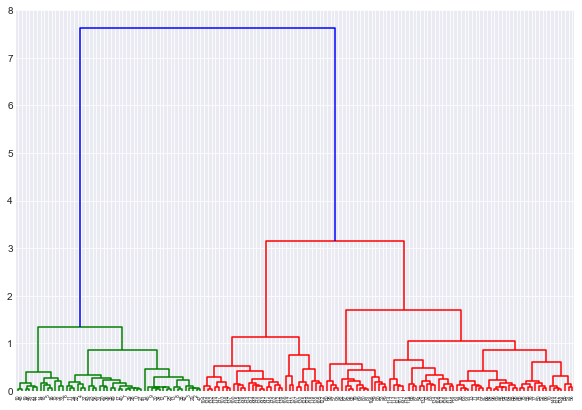

In [ ]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
#{"ward", "complete", "average", "single"}
#"euclidean", "l1", "l2","manhattan", "cosine", or "precomputed".

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity="l1", linkage='complete')
pred=cluster.fit_predict(iris_scaled)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

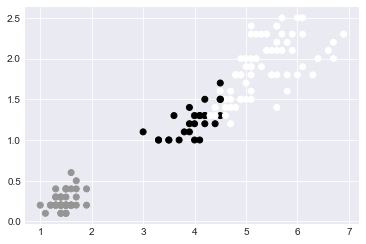

In [ ]:
plt.scatter(iris.iloc[:,2],iris.iloc[:,3],c=pred)

# ![dbscan.gif](attachment:dbscan.gif)

# ![DBSCAN_search.gif](attachment:DBSCAN_search.gif)

# dbscan

In [ ]:
from sklearn.datasets import make_moons
x,y=make_moons(100)

In [ ]:
y

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [ ]:
import pandas as pd
data=pd.DataFrame(x)
data

,0,1
0,1.981559,0.308841
1,0.949056,0.315108
2,0.967948,-0.499486
3,0.000000,0.500000
4,0.926917,0.375267
...,...,...
95,0.715472,-0.458668
96,-0.718349,0.695683
97,1.623490,-0.281831
98,-0.462538,0.886599


In [ ]:
data.columns=["f1","f2"]
data

,f1,f2
0,1.981559,0.308841
1,0.949056,0.315108
2,0.967948,-0.499486
3,0.000000,0.500000
4,0.926917,0.375267
...,...,...
95,0.715472,-0.458668
96,-0.718349,0.695683
97,1.623490,-0.281831
98,-0.462538,0.886599


In [ ]:
data["class"]=y

In [ ]:
data.head()

,f1,f2,class
0,1.981559,0.308841,1
1,0.949056,0.315108,0
2,0.967948,-0.499486,1
3,0.000000,0.500000,1
4,0.926917,0.375267,0


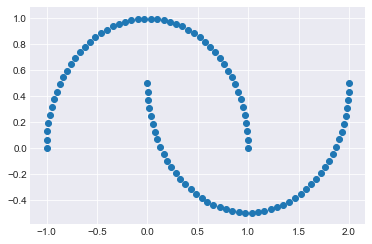

In [ ]:
plt.scatter(data["f1"],data["f2"],cmap=plt.cm.Accent)

# using kmeas for moon data

In [ ]:
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')

In [ ]:
model.fit(data.iloc[:,:2])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
claas_pr=model.predict(data.iloc[:,:2])

In [ ]:
data["class_pr"]=claas_pr

In [ ]:
data.head()

,f1,f2,class,class_pr
0,1.991790,0.372123,1,0
1,-0.032052,0.999486,0,1
2,0.032705,0.246345,1,1
3,1.926917,0.124733,1,0
4,0.838088,0.545535,0,0


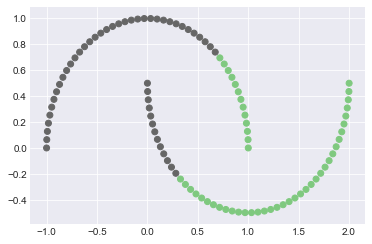

In [ ]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)

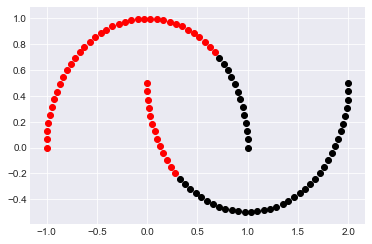

In [ ]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0],data[data["class_pr"]==1].iloc[:,1],color="red")
plt.scatter(data[data["class_pr"]==0].iloc[:,0],data[data["class_pr"]==0].iloc[:,1],color="black")

# Using Hierarchical Clustering

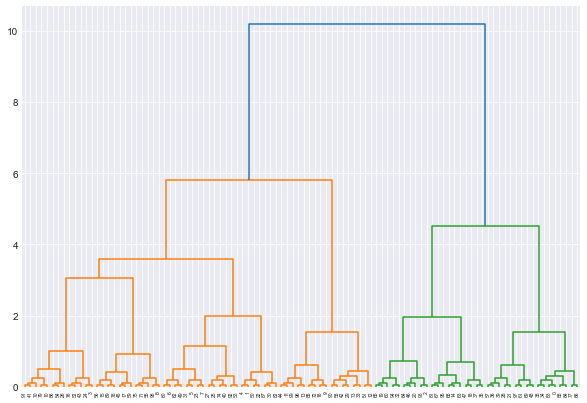

In [ ]:
linked = linkage(data.iloc[:,:2], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
#{"ward", "complete", "average", "single"}
#"euclidean", "l1", "l2","manhattan", "cosine", or "precomputed".



In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="single")
claas_pr=cluster.fit_predict(data.iloc[:,:2])

In [ ]:
data["class_pr"]=claas_pr

In [ ]:
data.head()

,f1,f2,class,class_pr
0,1.981559,0.308841,1,0
1,0.949056,0.315108,0,1
2,0.967948,-0.499486,1,0
3,0.000000,0.500000,1,0
4,0.926917,0.375267,0,1


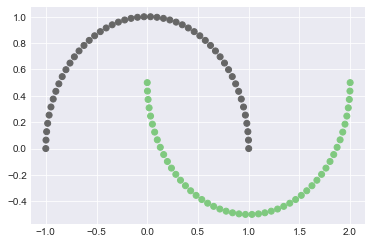

In [ ]:
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)

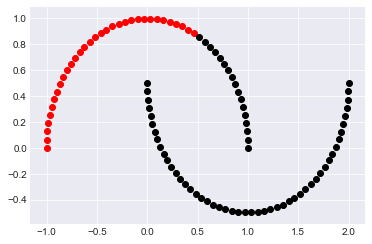

In [ ]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0],data[data["class_pr"]==1].iloc[:,1],color="red")
plt.scatter(data[data["class_pr"]==0].iloc[:,0],data[data["class_pr"]==0].iloc[:,1],color="black")

# applying dbscan

In [ ]:
from sklearn.cluster import DBSCAN 

In [ ]:
min_samples=2 #n

In [ ]:
??DBSCAN

In [ ]:
dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(data.iloc[:,:2])

In [ ]:
claas_pr

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [ ]:
data["class_pr"]=claas_pr
data

,f1,f2,class,class_pr
0,1.981559,0.308841,1,0
1,0.949056,0.315108,0,1
2,0.967948,-0.499486,1,0
3,0.000000,0.500000,1,0
4,0.926917,0.375267,0,1
...,...,...,...,...
95,0.715472,-0.458668,1,0
96,-0.718349,0.695683,0,1
97,1.623490,-0.281831,1,0
98,-0.462538,0.886599,0,1


Text(0, 0.5, 'f2')

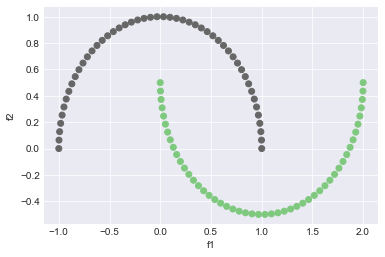

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data["f1"],data["f2"],c=data["class_pr"],cmap=plt.cm.Accent)
plt.xlabel("f1")
plt.ylabel("f2")

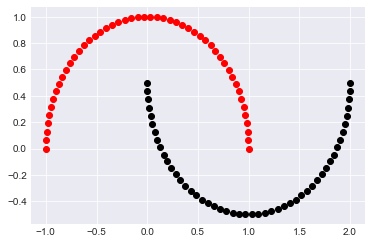

In [ ]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0],data[data["class_pr"]==1].iloc[:,1],color="red")
plt.scatter(data[data["class_pr"]==0].iloc[:,0],data[data["class_pr"]==0].iloc[:,1],color="black")

# logisticdrawback.csv

In [ ]:
data=pd.read_csv("logisticdrawback.csv")

In [ ]:
data.head()

,f1,f2,class
0,-1.335474,1.376236,1
1,-1.918388,-0.528479,1
2,0.015120,0.020986,1
3,-0.131351,0.119043,1
4,0.794606,1.421984,1


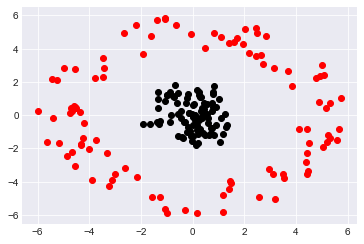

In [ ]:
plt.scatter(data[data["class"]==1].iloc[:,0],data[data["class"]==1].iloc[:,1],color="black")
plt.scatter(data[data["class"]==2].iloc[:,0],data[data["class"]==2].iloc[:,1],color="red")
plt.show() 

In [ ]:
data=data.iloc[:200,:2].copy()

# using kmeans

In [ ]:
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
class_pr=model.fit_predict(data.iloc[:,:2])

In [ ]:
data["class_pr"]=class_pr

In [ ]:
data.head()

,f1,f2,class_pr
0,-1.335474,1.376236,1
1,-1.918388,-0.528479,0
2,0.015120,0.020986,1
3,-0.131351,0.119043,1
4,0.794606,1.421984,1


In [ ]:
class_pr

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1], dtype=int32)

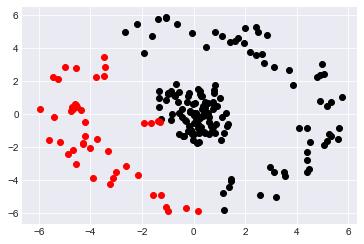

In [ ]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0],data[data["class_pr"]==1].iloc[:,1],color="black")
plt.scatter(data[data["class_pr"]==0].iloc[:,0],data[data["class_pr"]==0].iloc[:,1],color="red")
plt.scatter(data[data["class_pr"]==2].iloc[:,0],data[data["class_pr"]==2].iloc[:,1],color="blue")
plt.show()

# Using Hierarchical Clustering

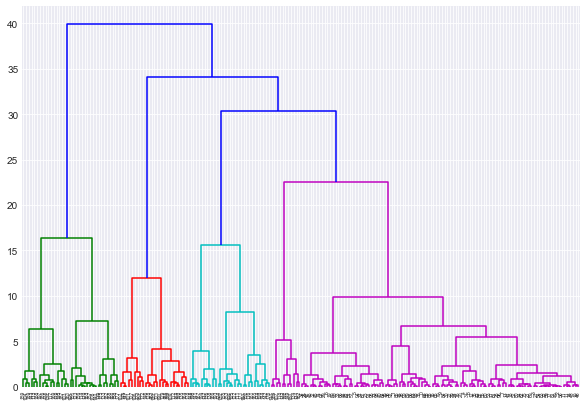

In [ ]:
linked = linkage(data.iloc[:,:2], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
class_pr=cluster.fit_predict(data.iloc[:,:2])

In [ ]:
data["class_pr"]=class_pr

In [ ]:
data.head()

,f1,f2,class_pr
0,-1.335474,1.376236,0
1,-1.918388,-0.528479,0
2,0.015120,0.020986,0
3,-0.131351,0.119043,0
4,0.794606,1.421984,0


In [ ]:
class_pr


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0])

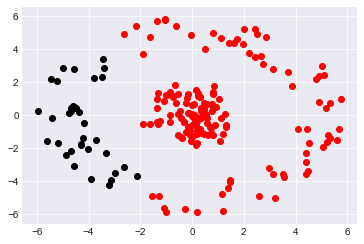

In [ ]:
plt.scatter(data[data["class_pr"]==1].iloc[:,0],data[data["class_pr"]==1].iloc[:,1],color="black")
plt.scatter(data[data["class_pr"]==0].iloc[:,0],data[data["class_pr"]==0].iloc[:,1],color="red")
plt.scatter(data[data["class_pr"]==2].iloc[:,0],data[data["class_pr"]==2].iloc[:,1],color="blue")
plt.show()

# applying dbscan

In [ ]:

dbs=DBSCAN(min_samples=2,eps=2)
class_pr=dbs.fit_predict(data.iloc[:200,:2])

In [ ]:
data["class_pr"]=class_pr

In [ ]:
set(class_pr)

{0, 1}

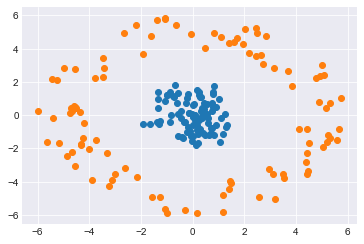

In [ ]:
for i in set(class_pr):
    plt.scatter(data[data["class_pr"]==i].iloc[:,0],data[data["class_pr"]==i].iloc[:,1])

# finding the optimal number of clusters

In [ ]:
import seaborn as sns
iris=sns.load_dataset("iris") 

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(iris.iloc[:,:4])
    iner.append(km.inertia_)

In [ ]:
#iner

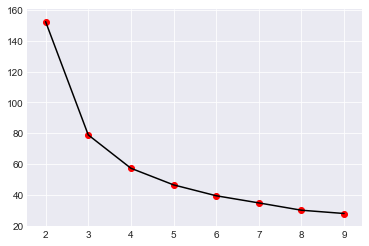

In [ ]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# silhouette_score 

In [ ]:
from sklearn.metrics import silhouette_score as sil

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.cluster import KMeans
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    iner.append(sil(iris.iloc[:,:4],y))

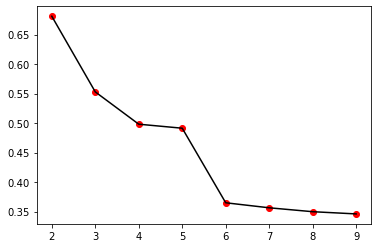

In [ ]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# calinski_harabaz_score

In [ ]:
from sklearn.metrics import calinski_harabaz_score as chs

In [ ]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(iris.iloc[:,:4])
    iner.append(chs(iris.iloc[:,:4],y))

/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/utils/depre

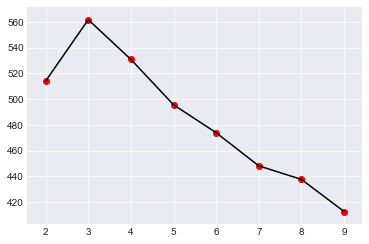

In [ ]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np
clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize").fit(data.iloc[:,:2])
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 2])